# **STINTSY Project**

***GROUP 5 - STINTSY S17***
| Member Name  | Member Github Username |
| ------------- | ------------- |
| Apetreor, Marcus  | Marcus-Apetreor  |
| Clavano, Angelica (Jack)  | clavzno  |
| Homssi, Yazan | Shinoruba  |

---

# **Section 1: Introduction to the Problem/task and Dataset**

For this project, we were assigned two real-world datasets. We selected the **Labor Force Survey (LFS)** from the Philippine Statistics Authority (PSA). The dataset contains a nationwide survey conducted in April 2016. It **aimed to estimate employment and unemployment levels and view the trends** in the country as whole and for each of the 17 administrative regions, which can then be used to provide a framework for labor market policies and plans. These kinds of data are important for economic analysis, policy formation, and planning at the regional and national level of country. The survey **collected data on demographic characteristics** (`household membership`, `relationship to head of the household`, `sex`, `age`, `marital status`, `education`, etc.) **and economic characteristics** (`employment status`, `industry group`, `class of worker`, `previous job`, `hours worked`, etc.)

Our group’s task for this project is a **classification task**, where we have to build model/s that will **predict the job variable** (specifically, `PUFC14_PROCC`) given the features above. The job variable is a categorical variable that represents the current job of the respondent.

---

# **Section 2: Description of the Dataset**

#### **Dataset Overview & Collection Process**

The dataset used in this project is the **Labor Force Survey (LFS) April 2016**, provided by the **Philippine Statistics Authority (PSA)**. It contains **180,862 observations** and **50 variables**, covering a wide range of **demographic, educational, employment, and job search-related information.**

The dataset was collected through a **nationwide household survey** and is used to analyze employment trends, workforce participation, and economic activity in the country. The data was collected from April 8, 2016 to April 30, 2016, and used the **2013 Master Sample Design** for household-based surveys. A master sample consists of randomly assigned and selected geographic areas with non-overlapping boundaries, known as primary sampling units (PSUs). PSUs contain 100-400 households. The mode of data collection is through face-to-face interviews.

The primary focus of this project is to predict **primary occupation** (`PUFC14_PROCC`) using various **demographic and employment-related features.** We want to predict this variable as it would be helpful in workforce planning for future endeavors. Knowing this kind of information would allow business owners or higher authorities to identify and allocate appropriate funds for the needs of the workforce, including development of training programs, educational initiatives, seminars, etc.

The dataset is available for public use through **PSADA (Philippine Statistics Authority Data Archive):**
- Download link: https://psada.psa.gov.ph/catalog/67/get-microdata
  - Dataset file: `LFS PUF April 2016.CSV`
  - Dictionary file: `lfs_april_2016_metadata(dictionary).xlsx` 
- Study Description: https://psada.psa.gov.ph/catalog/67/study-description
- Data Description: https://psada.psa.gov.ph/catalog/67/data-dictionary/F1?file_name=lfs_april2016&vcode=Uk464

#### **Dataset Structure**

The dataset is structured as a single file in the widely-used CSV (Comma-Separated Values) format. Each row represents an individual respondent, while each column captures specific demographic, employment, or job search characteristics.

The dataset comprises of:
- `180,862` total observations;
- `50` total number of variables; and
- `PUFC14_PROCC` being the target variable

#### **Dataset Features**
To facilitate analysis, variables are grouped into **five main categories**:

**1. Demographic + Regional Variables**
| **Variable** | **Description** | **Type** |
|-------------|---------------|--------|
| `PUFHHSIZE` | Number of household members | Numerical |
| `PUFC04_SEX` | Sex of the person | Binary Categorical |
| `PUFC05_AGE` | Age of the person | Numerical |
| `PUFC06_MSTAT` | Marital status | Categorical |

**2. Education Variables**
| **Variable** | **Description** | **Type** |
|-------------|---------------|--------|
| `PUFC08_CURSCH` | Currently attending school | Binary Categorical |
| `PUFC09_GRADTECH` | Graduate of a technical/vocational course | Binary Categorical |
| `PUFC07_GRADE` | Highest grade completed | Categorical |

**3. Employment Variables**
| **Variable** | **Description** | **Type** |
|-------------|---------------|--------|
| `PUFC11_WORK` | Worked in the past week | Binary Categorical |
| `PUFC12_JOB` | Had a job/business in the past week | Binary Categorical |
| **`PUFC14_PROCC`** | **Primary occupation (Target Variable)** | Categorical |
| `PUFC16_PKB` | Kind of business or industry | Categorical |
| `PUFC17_NATEM` | Nature of employment | Categorical |
| `PUFC18_PNWHRS` | Normal working hours per day | Numerical |
| `PUFC19_PHOURS` | Total hours worked in the past week | Numerical |
| `PUFC20_PWMORE` | Wants more hours of work | Binary Categorical |
| `PUFC21_PLADDW` | Looked for additional work | Binary Categorical |
| `PUFC22_PFWRK` | First time doing any work | Binary Categorical |
| `PUFC23_PCLASS` | Class of worker for primary occupation | Categorical |
| `PUFC24_PBASIS` | Basis of payment for primary occupation | Categorical |
| `PUFC25_PBASIC` | Basic pay per day | Numerical |
| `PUFC26_OJOB` | Had another job/business | Binary Categorical |
| `PUFC27_NJOBS` | Number of jobs in the past week | Numerical |
| `PUFC28_THOURS` | Total hours worked for all jobs | Numerical |
| `PUFNEWEMPSTAT` | New Employment Criteria | Categorical |

**4. Job Search Variables**
| **Variable** | **Description** | **Type** |
|-------------|---------------|--------|
| `PUFC30_LOOKW` | Looked for work or tried to establish a business | Binary Categorical |
| `PUFC31_FLWRK` | First time looking for work | Binary Categorical |
| `PUFC32_JOBSM` | Job search method | Categorical |
| `PUFC33_WEEKS` | Weeks spent looking for work | Numerical |
| `PUFC34_WYNOT` | Reason for not looking for work | Categorical |
| `PUFC35_LTLOOKW` | Last time looked for work | Numerical |
| `PUFC36_AVAIL` | Available for work | Binary Categorical |
| `PUFC37_WILLING` | Willing to take up work | Binary Categorical |
| `PUFC38_PREVJOB` | Worked at any time before | Binary Categorical |
| `PUFC40_POCC` | Last occupation | Categorical |
| `PUFC41_WQTR` | Worked or had a job during the past quarter | Binary Categorical |
| `PUFC43_QKB` | Kind of business for the past quarter | Categorical |

**5. Excluded Miscellaneous Variables**
The following variables were removed as they were **either redundant, IDs, or not useful for prediction**:

| **Variable** | **Description** |
|-------------|---------------|
| `PUFSVYMO` | Survey month (Date) |
| `PUFSVYYR` | Survey year (Date) |
| `PUFPSU` | PSU number (ID) |
| `PUFRPL` | Replicate (ID) |
| `PUFPWGTFIN` | Final weight based on projection (ID) |
| `PUFHHNUM` | Household unique sequential number (ID) |
| `PUFREG` | Region (ID) |
| `PUFPRV` | Province code (ID) |
| `PUFPRRCD` | Province recode (ID) |

We will be cross referencing the responses with a valueset provided alongside the dataset which was uploaded onto google sheets for easier viewing: https://docs.google.com/spreadsheets/d/1y1n2LIWIda9aI5Cur8I5_HXIJUDbuXewTbNlI1y1uEU/edit?usp=sharing

# **Section 3: List of requirements**

## Pre-requisites
<span style="background-color:green">*// To Do (Jacky Boy)*</style>
### Creating the requirements.txt
- `pip install pipreqs`
- `pipreqs /path/to/project`

<span style="background-color:green">*// To Do (Jacky Boy)*</style>

### Installing requirements.txt
- In the terminal, please type `pip install -r requirements.txt` to install the necessary libraries.
- The dataset and other necessary files are available in the `data` folder.
- Project instructions, etc. are in the `Project Specifications` folder

If you are running a separate Python kernel compared to the default on your local computer. Please uncomment and run the following codeblock. This project uses Python 3.12.0 (mostly for compatability reasons with tensorflow)

In [1949]:
# pip install -r requirements.txt

### Loading the Dataset

In [1950]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind
from tensorflow.keras import layers, Model
import tensorflow as tf


---

# **Section 4: Data Preprocessing and Cleaning**

In [1951]:
lfs_df = pd.read_csv('./data/LFS PUF April 2016.csv')
lfs_df.head()

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,,,,,,,,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,,,,,,,,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,,,,,,,,1,96,1


In [1952]:
lfs_df.info()

print("\nNumber of entries/instances:",len(lfs_df)) # shows how many entries/instances
print("Number of columns:",len(lfs_df.columns))     # shows how many columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180862 entries, 0 to 180861
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PUFREG           180862 non-null  int64  
 1   PUFPRV           180862 non-null  int64  
 2   PUFPRRCD         180862 non-null  int64  
 3   PUFHHNUM         180862 non-null  int64  
 4   PUFURB2K10       180862 non-null  int64  
 5   PUFPWGTFIN       180862 non-null  float64
 6   PUFSVYMO         180862 non-null  int64  
 7   PUFSVYYR         180862 non-null  int64  
 8   PUFPSU           180862 non-null  int64  
 9   PUFRPL           180862 non-null  int64  
 10  PUFHHSIZE        180862 non-null  int64  
 11  PUFC01_LNO       180862 non-null  int64  
 12  PUFC03_REL       180862 non-null  int64  
 13  PUFC04_SEX       180862 non-null  int64  
 14  PUFC05_AGE       180862 non-null  int64  
 15  PUFC06_MSTAT     180862 non-null  object 
 16  PUFC07_GRADE     180862 non-null  obje

To start with the data cleaning, we first need to exclude the variables we will not be working with. We will save the **filtered dataset** as jobs_df.

* We drop the date variables as it is obsolete. The data is already labeled to be collected from the same year and same month.
* We drop the ID numbers and provincial codes/recodes as they serve no purpose in our analysis.
* We drop all variables related to unemployment, as we will be focusing on only those employed in this dataset.
* We drop all variables that don't tell us anything, such as NEWEMPSTAT with the choices "employed", "unemployed", and "not in the labor force", as it is assumed that all respondents will be employed.

To check which variables become filled with whitespace when unemployed are removed, we use the following code:

In [1953]:
filtered_jobs_df = lfs_df[lfs_df['PUFC17_NATEM'].str.strip() != '']
empty_columns = [
    col for col in filtered_jobs_df.columns
    if filtered_jobs_df[col].astype(str).str.strip().eq('').all()
]
empty_columns

['PUFC30_LOOKW',
 'PUFC31_FLWRK',
 'PUFC32_JOBSM',
 'PUFC33_WEEKS',
 'PUFC34_WYNOT',
 'PUFC35_LTLOOKW',
 'PUFC36_AVAIL',
 'PUFC37_WILLING',
 'PUFC38_PREVJOB',
 'PUFC40_POCC']

In [1954]:
exclude_vars = ['PUFSVYMO', 'PUFSVYYR', 'PUFPSU', 'PUFRPL', 'PUFPWGTFIN', 'PUFPRV', 'PUFPRRCD', 'PUFHHNUM', 'PUFNEWEMPSTAT']
jobs_df = lfs_df.drop(columns=exclude_vars).copy()
jobs_df = jobs_df.drop(columns=empty_columns).copy()
jobs_df.shape

(180862, 31)

First, we check for duplicate data or NaN values in the original dataframe before grouping the selected variables together.

In [1955]:
duplicate_count = jobs_df.duplicated().sum()
duplicate_count

np.int64(26171)

In [1956]:
null_count = jobs_df.isnull().sum()
null_count

C:\Users\gicac\AppData\Roaming\Python\Python312\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


PUFREG             0
PUFURB2K10         0
PUFHHSIZE          0
PUFC01_LNO         0
PUFC03_REL         0
PUFC04_SEX         0
PUFC05_AGE         0
PUFC06_MSTAT       0
PUFC07_GRADE       0
PUFC08_CURSCH      0
PUFC09_GRADTECH    0
PUFC10_CONWR       0
PUFC11_WORK        0
PUFC12_JOB         0
PUFC14_PROCC       0
PUFC16_PKB         0
PUFC17_NATEM       0
PUFC18_PNWHRS      0
PUFC19_PHOURS      0
PUFC20_PWMORE      0
PUFC21_PLADDW      0
PUFC22_PFWRK       0
PUFC23_PCLASS      0
PUFC24_PBASIS      0
PUFC25_PBASIC      0
PUFC26_OJOB        0
PUFC27_NJOBS       0
PUFC28_THOURS      0
PUFC29_WWM48H      0
PUFC41_WQTR        0
PUFC43_QKB         0
dtype: int64

We have found duplicates, we will be using a VAE to generate in place of the duplicated variables.

We have chosen VAE because it is more applicable to tabular data, it is more interpretable, easier to train, and more stable.

In [1957]:
jobs_df.head(20)

,PUFREG,PUFURB2K10,PUFHHSIZE,PUFC01_LNO,PUFC03_REL,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC08_CURSCH,...,PUFC22_PFWRK,PUFC23_PCLASS,PUFC24_PBASIS,PUFC25_PBASIC,PUFC26_OJOB,PUFC27_NJOBS,PUFC28_THOURS,PUFC29_WWM48H,PUFC41_WQTR,PUFC43_QKB
0,1,2,3,1,1,1,49,2,350,,...,2,3,,,1,1,032,,1,01
1,1,2,3,2,2,2,61,2,350,,...,2,6,,,2,,008,,1,01
2,1,2,3,3,3,1,19,1,350,2,...,2,1,3,00250,1,1,034,,1,01
3,1,2,4,1,1,1,48,2,320,,...,2,3,,,1,2,033,,1,01
4,1,2,4,2,2,2,41,2,350,,...,2,0,4,00115,2,,072,2,1,96
5,1,2,4,3,3,1,20,1,350,2,...,2,1,3,00200,2,,048,,1,01
6,1,2,4,4,3,2,15,1,320,1,...,,,,,,,,,,
7,1,2,4,1,1,1,59,2,350,,...,2,3,,,1,1,032,,1,01
8,1,2,4,2,2,2,61,2,350,,...,2,2,7,,2,,010,,1,84
9,1,2,4,3,6,2,11,1,250,1,...,,,,,,,,,,


There still seems to be blank values, though, after consulting the valueset, they are the corresponding value to "not-applicable" (N/A) answers, which we will change to be more readable in the preprocessing phase.

As there are still whitespace values, we will be implementing the VAE model after preprocessing all of the included variables.

## **Binary Categorical Variable Preprocessing**

We can start our data cleaning process with binary categorical variables.

Given these responses and cross referencing these responses with the valueset provided along with the dataset, we are able to first understand what each of these responses mean.

* `PUC08_CURSCH` responses represent whether the respondent is currently attending school or not.
* `PUFC11_WORK` responses represent whether the respondent has worked in the past week.
* `PUFC12_JOB` responses represent whether the respondent had a job in the past week.
* `PUFC20_PWMORE` responses represent whether the respondent wants more work hours.
* `PUFC21_PLADDW` responses represent whether the respondent has looked for additional work.
* `PUFC22_PFWRK` responses represent whether its is the respondent's first time doing any work.
* `PUFC26_OJOB`  responses represents whether the respondent currently has another job aside from their primary occupation.
* `PUFC30_LOOKW` responses represent whether the respondent has attempted to look for a work/establish a business within the past week. 
* `PUFC31_FLWRK` responses represent whether it is the respondent's first time searching for work.
* `PUFC36_AVAIL` responses represent whether the respondent is available for work. **NOTE**: has no blank option that says "not applicable"
* `PUFC37_WILLING` responses represent whether the respondent is willing to take up work. 
* `PUFC38_PREVJOB` responses represent whether the respondent has worked at any time before. **NOTE**: has no blank option that says "not applicable"
* `PUFC41_WQTR` responses represent whether the respondent has worked or had a job during the past quarter.

For all the binary categorical variables, Valueset Excel File dictates that:
* 1 = `Yes`
* 2 = `No`
* blank = `Not Applicable`

From this, we can treat all variables with binary categorical outputs the same.

Given these representations, we are then able to convert and combine them into 2 distinct responses by combining No(2), and N/A(blank) into No(0), and leaving Yes as Yes(1).

In [1958]:
binary_categorical = [
    "PUFC08_CURSCH", 
    "PUFC26_OJOB", 
    "PUFC09_GRADTECH",
    "PUFC11_WORK",
    "PUFC12_JOB",
    "PUFC20_PWMORE",
    "PUFC21_PLADDW",
    "PUFC22_PFWRK",
    "PUFC30_LOOKW", 
    "PUFC31_FLWRK",
    "PUFC36_AVAIL", 
    "PUFC37_WILLING", 
    "PUFC38_PREVJOB", 
    "PUFC41_WQTR"
]

Printing the unique values prior to combining No(2) and N/A(blank) into No(0) for each of the binary categorical variables, we can see that the unique values are as follows:

In [1959]:
for i in binary_categorical:
    if i in jobs_df.columns:
        print(f"Variable: {i}")
        print(f"Unique values: {jobs_df[i].unique()}") # could also use valuecounts()
        print(f"Info: {jobs_df[i].info()}") # to check dtype
        print()

Variable: PUFC08_CURSCH
Unique values: [' ' '2' '1']
<class 'pandas.core.series.Series'>
RangeIndex: 180862 entries, 0 to 180861
Series name: PUFC08_CURSCH
Non-Null Count   Dtype 
--------------   ----- 
180862 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB
Info: None

Variable: PUFC26_OJOB
Unique values: ['1' '2' ' ']
<class 'pandas.core.series.Series'>
RangeIndex: 180862 entries, 0 to 180861
Series name: PUFC26_OJOB
Non-Null Count   Dtype 
--------------   ----- 
180862 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB
Info: None

Variable: PUFC09_GRADTECH
Unique values: ['2' ' ' '1']
<class 'pandas.core.series.Series'>
RangeIndex: 180862 entries, 0 to 180861
Series name: PUFC09_GRADTECH
Non-Null Count   Dtype 
--------------   ----- 
180862 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB
Info: None

Variable: PUFC11_WORK
Unique values: ['1' '2' ' ']
<class 'pandas.core.series.Series'>
RangeIndex: 180862 entries, 0 to 180861
Series name: PUFC11_WORK
Non-Null

Here, we're converting the object data type to string datatype for the binary categorical variables. Then replace the values with the corresponding mapping (i.e. 1-yes, etc.).

In [1960]:
for column in binary_categorical:
    if column in jobs_df.columns:
        jobs_df[column] = jobs_df[column].astype('str')
        jobs_df[column] = jobs_df[column].replace({
            '1': 'yes',
            '2': 'no',
            ' ': 'no'  # treat whitespace as "no"
        })

We display the counts of each response for each binary categorical variable to ensure that the conversion was successful.

In [1961]:
for i in binary_categorical:
    if i in jobs_df.columns:
        print(f"Variable: {i}")
        print(f"Unique values: {jobs_df[i].unique()}") # could also use valuecounts()
        print()

Variable: PUFC08_CURSCH
Unique values: ['no' 'yes']

Variable: PUFC26_OJOB
Unique values: ['yes' 'no']

Variable: PUFC09_GRADTECH
Unique values: ['no' 'yes']

Variable: PUFC11_WORK
Unique values: ['yes' 'no']

Variable: PUFC12_JOB
Unique values: ['no' 'yes']

Variable: PUFC20_PWMORE
Unique values: ['yes' 'no']

Variable: PUFC21_PLADDW
Unique values: ['yes' 'no']

Variable: PUFC22_PFWRK
Unique values: ['no' 'yes']

Variable: PUFC41_WQTR
Unique values: ['yes' 'no']



## **Categorical Variable Preprocessing**

Now that we've converted the binary category variables into their respective datatypes and responses, we move on to the other categorical variables.

### Nature of Employment variable (PUFC17_NATEM)

Moving on to the variable `PUFC17_NATEM`, which represents the nature of employment of each respondent,
* 1 = Permanent Job
* 2 = Short-term
* 3 = Different employer
* blank = Not applicable/no employment

Since our aim will be to focus on the respondents who are employed, we drop all respondents who are not employed.

In [1962]:
jobs_df = jobs_df[jobs_df['PUFC17_NATEM'] != ' ']
jobs_df.head(20)

,PUFREG,PUFURB2K10,PUFHHSIZE,PUFC01_LNO,PUFC03_REL,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC08_CURSCH,...,PUFC22_PFWRK,PUFC23_PCLASS,PUFC24_PBASIS,PUFC25_PBASIC,PUFC26_OJOB,PUFC27_NJOBS,PUFC28_THOURS,PUFC29_WWM48H,PUFC41_WQTR,PUFC43_QKB
0,1,2,3,1,1,1,49,2,350,no,...,no,3,,,yes,1,032,,yes,01
1,1,2,3,2,2,2,61,2,350,no,...,no,6,,,no,,008,,yes,01
2,1,2,3,3,3,1,19,1,350,no,...,no,1,3,00250,yes,1,034,,yes,01
3,1,2,4,1,1,1,48,2,320,no,...,no,3,,,yes,2,033,,yes,01
4,1,2,4,2,2,2,41,2,350,no,...,no,0,4,00115,no,,072,2,yes,96
5,1,2,4,3,3,1,20,1,350,no,...,no,1,3,00200,no,,048,,yes,01
7,1,2,4,1,1,1,59,2,350,no,...,no,3,,,yes,1,032,,yes,01
8,1,2,4,2,2,2,61,2,350,no,...,no,2,7,,no,,010,,yes,84
11,1,2,4,1,1,1,51,2,350,no,...,no,3,,,no,,020,,yes,49
14,1,2,4,4,3,1,23,1,350,no,...,no,1,4,00335,no,,060,1,yes,80


In [1963]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71355 entries, 0 to 180861
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PUFREG           71355 non-null  int64 
 1   PUFURB2K10       71355 non-null  int64 
 2   PUFHHSIZE        71355 non-null  int64 
 3   PUFC01_LNO       71355 non-null  int64 
 4   PUFC03_REL       71355 non-null  int64 
 5   PUFC04_SEX       71355 non-null  int64 
 6   PUFC05_AGE       71355 non-null  int64 
 7   PUFC06_MSTAT     71355 non-null  object
 8   PUFC07_GRADE     71355 non-null  object
 9   PUFC08_CURSCH    71355 non-null  object
 10  PUFC09_GRADTECH  71355 non-null  object
 11  PUFC10_CONWR     71355 non-null  object
 12  PUFC11_WORK      71355 non-null  object
 13  PUFC12_JOB       71355 non-null  object
 14  PUFC14_PROCC     71355 non-null  object
 15  PUFC16_PKB       71355 non-null  object
 16  PUFC17_NATEM     71355 non-null  object
 17  PUFC18_PNWHRS    71355 non-null  ob

This narrows our respondents to 71355 respondents.

### Primary Occupation variable (PUFC14_PROCC)

`PUFC14_PROCC` represents the primary occupation of the respondents.

According to the valueset, the responses are grouped into different bins:
* 11-14 = managers
* 21-26 = professionals
* 31-36 = technicians and associate professionals
* 41-44 = clerical support workers
* 51-54 = service and sales workers
* 61-63 = skilled agricultural, forestry and fishery workers
* 71-75 = craft and related trades workers
* 81-83 = plant and machine operators and assemblers
* 91-96 = elementary occupations
* 1-3 = armed forces occupations

In [1964]:
jobs_df['PUFC14_PROCC'].value_counts()

PUFC14_PROCC
92    9565
61    8499
14    6820
52    5546
93    5239
13    3968
91    3026
83    2823
51    2778
71    2524
62    1963
23    1862
42    1572
54    1529
75    1160
33     963
72     907
41     871
96     851
11     751
53     696
81     683
43     652
22     563
44     533
31     520
12     506
74     499
34     422
24     412
32     405
21     368
73     356
82     320
26     292
94     220
25     174
35     171
95     147
03     100
01      40
02      33
63      26
Name: count, dtype: int64

We can group the different responses into categorical bins and represent their numbers as the title of their occupation.

In [1965]:
PUFC14_PROCC_bins = [0, 3, 14, 26, 36, 44, 54, 63, 75, 83, 97]
PUFC14_PROCC_labels = [
    'Armed Forces Occupations',
    'Managers',
    'Professionals',
    'Technicians and Associate Professionals',
    'Clerical Support Workers',
    'Service and Sales Workers',
    'Skilled Agricultural, Forestry and Fishery Workers',
    'Craft and Related Trades Workers',
    'Plant and Machine Operators and Assemblers',
    'Elementary Occupations',
]

To start the binning process, we first have to convert the variable to an integer as it is currently an object.

In [1966]:
jobs_df['PUFC14_PROCC'] = jobs_df['PUFC14_PROCC'].astype('int')

Now we start the binning process that the datatype has been modified.

In [1967]:
jobs_df['PUFC14_PROCC'] = pd.cut(jobs_df['PUFC14_PROCC'], bins=PUFC14_PROCC_bins, labels=PUFC14_PROCC_labels, right=False)

jobs_df['PUFC14_PROCC'].value_counts()

PUFC14_PROCC
Elementary Occupations                                21871
Skilled Agricultural, Forestry and Fishery Workers    11991
Professionals                                         10199
Service and Sales Workers                              9553
Managers                                               5325
Craft and Related Trades Workers                       4312
Clerical Support Workers                               3095
Technicians and Associate Professionals                2773
Plant and Machine Operators and Assemblers             2163
Armed Forces Occupations                                 73
Name: count, dtype: int64

In [1968]:
jobs_df['PUFC14_PROCC'].info()

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC14_PROCC
Non-Null Count  Dtype   
--------------  -----   
71355 non-null  category
dtypes: category(1)
memory usage: 627.5 KB


The datatype automatically gets converted into 'category' datatype, so no need to convert the datatype.

### Highest Grade Completed variable (PUFC07_GRADE)

In [1969]:
jobs_df['PUFC07_GRADE'].unique()

array(['350', '320', '240', '220', '614', '330', '632', '280', '900',
       '672', '589', '830', '634', '230', '820', '810', '686', '552',
       '840', '000', '681', '534', '250', '310', '648', '581', '572',
       '210', '652', '662', '601', '658', '642', '562', '548', '685',
       '631', '621', '410', '622', '010', '584', '420', '340', '684',
       '260', '664', '676', '521', '638', '646', '689', '644', '532',
       '531', '554', '514', '558', '501', '586', '654', '522', '542',
       '576', '585', '564'], dtype=object)

Highest Grade Completed:
* 0 = No Grade Completed
* 10 = Preschool
* 210 = Grade 1
* 220 = Grade 2
* 230 = Grade 3
* 240 = Grade 4
* 250 = Grade 5
* 260 = Grade 6
* 280 = Elementary Graduate
* 310 = First Year High School/Grade 7
* 320 = Second Year High School
* 330 = Third Year High School
* 340 = Fourth Year High School
* 350 = High School Graduate
* 410 = First Year Post Secondary
* 420 = Second Year Post Secondary
* 810 = First Year College
* 820 = Second Year College
* 830 = Third Year College
* 840 = Fourth Year College
* 900 = Post Baccalaureate
* 501 = Basic Programs
* 508 = Literacy and Numeracy Programs
* 509 = Personal Development Programs
* 514 = Teacher Training and Education Sciences Programs
* 521 = Arts Programs
* 522 = Humanities Programs
* 531 = Social and Behavioral Science Programs
* 532 = Journalism and Information Programs
* 534 = Business and Administration Programs
* 542 = Life Sciences Programs
* 544 = Physical Sciences Programs
* 548 = Computing/Information Technology Programs
* 552 = Engineering and Engineering trades Programs
* 554 = Manufacturing and Processing Programs
* 558 = Architecture and Building Programs
* 562 = Agriculture, Forestry, and Fishery Programs
* 564 = Veterinary Programs
* 572 = Health Programs
* 576 = Social Services Programs
* 581 = Personal Services Programs
* 584 = Transport Services Programs
* 585 = Environmental Protection Programs
* 586 = Security Services Programs
* 589 = Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree
* 601 = Basic Programs
* 614 = Teacher Training and Education Sciences Programs
* 621 = Arts Programs
* 622 = Humanities Programs
* 631 = Social and Behavioral Science Programs
* 632 = Journalism and Information Programs
* 634 = Business and Administration Programs
* 638 = Law Programs
* 642 = Life Sciences Programs
* 644 = Physical Sciences Programs
* 646 = Mathematics and Statistics Programs
* 648 = Computing/Information Technology Programs
* 652 = Engineering and Engineering Trades Programs
* 654 = Manufacturing and Processing Programs
* 658 = Architecture and Building Programs
* 662 = Agriculture, Forestry, and Fishery Programs
* 664 = Veterinary Programs
* 672 = Health Programs
* 676 = Social Services Programs
* 681 = Personal Services Programs
* 684 = Transport Services Programs
* 685 = Environmental Protection Programs
* 686 = Security Services Programs
* 689 = Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree

We first have to check for whitespace counts before proceeding.

In [1970]:
whitespace_count = (jobs_df['PUFC07_GRADE'].astype(str).str.strip() == '').sum()
whitespace_count

np.int64(0)

Now that we know there are whitespaces, and the valueset does not say anything about non-applicable values for this variable, we can implement mode-impute.

In [1971]:
jobs_df['PUFC07_GRADE'] = jobs_df['PUFC07_GRADE'].astype(str).str.strip().replace('', np.nan)
mode_value = jobs_df['PUFC07_GRADE'].mode()[0]
jobs_df['PUFC07_GRADE'] = jobs_df['PUFC07_GRADE'].fillna(mode_value)

Now that we have dealt with the whitespace values, we are able to convert the datatype to int to be able to convert the output into the corresponding mappings easier.

In [1972]:
jobs_df['PUFC07_GRADE'] = jobs_df['PUFC07_GRADE'].astype('int')
jobs_df['PUFC07_GRADE'].unique()

array([350, 320, 240, 220, 614, 330, 632, 280, 900, 672, 589, 830, 634,
       230, 820, 810, 686, 552, 840,   0, 681, 534, 250, 310, 648, 581,
       572, 210, 652, 662, 601, 658, 642, 562, 548, 685, 631, 621, 410,
       622,  10, 584, 420, 340, 684, 260, 664, 676, 521, 638, 646, 689,
       644, 532, 531, 554, 514, 558, 501, 586, 654, 522, 542, 576, 585,
       564])

We can then group the corresponding numbers into their own categorical values using mapping for easier readability.

In [1973]:
PUFC07_GRADE_mapping = {
    0: 'No Grade Completed',
    10: 'Preschool',
    210: 'Grade 1',
    220: 'Grade 2',
    230: 'Grade 3',
    240: 'Grade 4',
    250: 'Grade 5',
    260: 'Grade 6',
    280: 'Elementary Graduate',
    310: 'First Year High School/Grade 7',
    320: 'Second Year High School',
    330: 'Third Year High School',
    340: 'Fourth Year High School',
    350: 'High School Graduate',
    410: 'First Year Post Secondary',
    420: 'Second Year Post Secondary',
    810: 'First Year College',
    820: 'Second Year College',
    830: 'Third Year College',
    840: 'Fourth Year College',
    900: 'Post Baccalaureate',
    501: 'Basic Programs',
    508: 'Literacy and Numeracy Programs',
    509: 'Personal Development Programs',
    514: 'Teacher Training and Education Sciences Programs',
    521: 'Arts Programs',
    522: 'Humanities Programs',
    531: 'Social and Behavioral Science Programs',
    532: 'Journalism and Information Programs',
    534: 'Business and Administration Programs',
    542: 'Life Sciences Programs',
    544: 'Physical Sciences Programs',
    548: 'Computing/Information Technology Programs',
    552: 'Engineering and Engineering trades Programs',
    554: 'Manufacturing and Processing Programs',
    558: 'Architecture and Building Programs',
    562: 'Agriculture, Forestry, and Fishery Programs',
    564: 'Veterinary Programs',
    572: 'Health Programs',
    576: 'Social Services Programs',
    581: 'Personal Services Programs',
    584: 'Transport Services Programs',
    585: 'Environmental Protection Programs',
    586: 'Security Services Programs',
    589: 'Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree',
    601: 'Basic Programs',
    614: 'Teacher Training and Education Sciences Programs',
    621: 'Arts Programs',
    622: 'Humanities Programs',
    631: 'Social and Behavioral Science Programs',
    632: 'Journalism and Information Programs',
    634: 'Business and Administration Programs',
    638: 'Law Programs',
    642: 'Life Sciences Programs',
    644: 'Physical Sciences Programs',
    646: 'Mathematics and Statistics Programs',
    648: 'Computing/Information Technology Programs',
    652: 'Engineering and Engineering Trades Programs',
    654: 'Manufacturing and Processing Programs',
    658: 'Architecture and Building Programs',
    662: 'Agriculture, Forestry, and Fishery Programs',
    664: 'Veterinary Programs',
    672: 'Health Programs',
    676: 'Social Services Programs',
    681: 'Personal Services Programs',
    684: 'Transport Services Programs',
    685: 'Environmental Protection Programs',
    686: 'Security Services Programs',
    689: 'Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree'
}

Now that we have created the mapping, we can assign each value to each number.

In [1974]:
jobs_df['PUFC07_GRADE'] = jobs_df['PUFC07_GRADE'].map(PUFC07_GRADE_mapping)
jobs_df['PUFC07_GRADE'] = jobs_df['PUFC07_GRADE'].astype('string')
jobs_df['PUFC07_GRADE'].head(20)

0                                 High School Graduate
1                                 High School Graduate
2                                 High School Graduate
3                              Second Year High School
4                                 High School Graduate
5                                 High School Graduate
7                                 High School Graduate
8                                 High School Graduate
11                                High School Graduate
14                                High School Graduate
15                                             Grade 4
16                                             Grade 2
17    Teacher Training and Education Sciences Programs
18                              Third Year High School
20                                High School Graduate
24                             Second Year High School
25                 Journalism and Information Programs
27                                High School Graduate
28        

### Marital Status variable (PUFC06_MSTAT)

In [1975]:
jobs_df['PUFC06_MSTAT'].unique()

array(['2', '1', '4', '3', '5', '6'], dtype=object)

We first check for whitespace.

In [1976]:
whitespace_count = (jobs_df['PUFC06_MSTAT'].astype(str).str.strip() == '').sum()
whitespace_count

np.int64(0)

Seeings as there are no whitespaces left, we can directly go to data representation.
* 1 = Single
* 2 = Married
* 3 = Widowed
* 4 = Divorce/Separate
* 5 = Annuled
* 6 = Unknown

Seeing as it is currently of "object" datatype, we have to first convert the integers to the int datatype.

In [1977]:
jobs_df['PUFC06_MSTAT'] = jobs_df['PUFC06_MSTAT'].astype('int')

We can create a mapping for this:

In [1978]:
PUFC06_MSTAT_mapping = {
    1: 'Single',
    2: 'Married',
    3: 'Widowed',
    4: 'Divorced/Separate',
    5: 'Annuled',
    6: 'Unknown'
}

Now we can assign each integer to their assigned mapping.

In [1979]:
jobs_df['PUFC06_MSTAT'] = jobs_df['PUFC06_MSTAT'].map(PUFC06_MSTAT_mapping)
jobs_df['PUFC06_MSTAT'] = jobs_df['PUFC06_MSTAT'].astype('string')
jobs_df['PUFC06_MSTAT'].head(20)

0     Married
1     Married
2      Single
3     Married
4     Married
5      Single
7     Married
8     Married
11    Married
14     Single
15    Married
16    Married
17     Single
18    Married
20     Single
24     Single
25     Single
27     Single
28     Single
29    Married
Name: PUFC06_MSTAT, dtype: string

### Sex variable (PUFC04_SEX)

Starting off with `PUFC04_SEX` which is the sex of the respondent, according to the valueset,
* 1 = Male
* 2 = Female

Therefore we may opt to change the numbers into characters M and F for easier readability.

In [1980]:
jobs_df['PUFC04_SEX'].value_counts()

PUFC04_SEX
1    43925
2    27430
Name: count, dtype: int64

We change the datatype to the 'category' from object first.

In [1981]:
jobs_df['PUFC04_SEX'] = jobs_df['PUFC04_SEX'].astype('string')

In [1982]:
jobs_df['PUFC04_SEX'] = jobs_df['PUFC04_SEX'].replace({'2': 'F', '1': 'M'})
jobs_df['PUFC04_SEX'].value_counts()

PUFC04_SEX
M    43925
F    27430
Name: count, dtype: Int64

### Kind of Industry variable (PUFC16_PKB)

The `PUFC16_PKB` variable dictates the major industry that the respondent works in.

The `PUFC16_PKB` variable has 2 sets of bins, the first one encompassing the general industrty that the respondent works in:
* 1-3 = Agricultural
* 5-43 = Industrial
* 45-99 = Services

The other set of bins being the more specific industry that the respondent works in:
* 1-2 = Agriculture and Forestry
* 3 = Fishing
* 5-9 = Mining and Quarying
* 10-33 = Manufacturing
* 35 = Electricity, Gas, Steam and Airconditioning Supply
* 36-39 = Water Supply; Sewage, Waste Management and Remediation Activities
* 41-43 = Construction
* 45-47 = Whosale and Retail Trade; Repair of Motor Vehicles and Motorcycles
* 49-53 = Transportation and Storage
* 55-56 = Accommodation and Food Service Activities
* 58-63 = Information and Communication
* 64-66 = Financial and Insurance Activities
* 68 = Real Estate Activities
* 69-75 = Professional, Scientific and Technical Activities
* 77-82 = Administrative and Support Service Activities
* 84 = Public Administration and Defense; Compulsory Social Security
* 85 = Education
* 86-88 = Human Health and Social Work Activities
* 90-93 = Arts, Entertainment and Recreation
* 94-96 = Other Service Activities
* 97-98 = Activities of Households as Employers
* 99 = Activities of Extraterritorial Organizations and Bodies

Given these bins, we can make a separate column that shows the general industry that the respondent works in, while keeping PUFC16_PKB to show their specific industry.

In [1983]:
PUFC16_PKB_GENERAL_bins = [0, 3, 43, 99]
PUFC16_PKB_GENERAL_labels = [
    'Agricultural',
    'Industrial',
    'Services']

PUFC16_PKB_bins = [0, 2, 3, 9, 33, 35, 39, 43, 47, 53, 56, 63, 66, 68, 75, 82, 84, 85, 88, 93, 96, 98, 99]
PUFC16_PKB_labels = [
    'Agriculture and Forestry',
    'Fishing',
    'Mining and Quarying',
    'Manufacturing',
    'Electricity, Gas, Steam and Airconditioning Supply',
    'Water Supply; Sewage, Waste Management and Remediation Activities',
    'Construction',
    'Whosale and Retail Trade; Repair of Motor Vehicles and Motorcycles',
    'Transportation and Storage',
    'Accommodation and Food Service Activities',
    'Information and Communication',
    'Financial and Insurance Activities',
    'Real Estate Activities',
    'Professional, Scientific and Technical Activities',
    'Administrative and Support Service Activities',
    'Public Administration and Defense; Compulsory Social Security',
    'Education',
    'Human Health and Social Work Activities',
    'Arts, Entertainment and Recreation',
    'Other Service Activities',
    'Activities of Households as Employers',
    'Activities of Extraterritorial Organizations and Bodies'
]

We have to first convert the datatype into the integer datatype in order to bin the responses properly.

In [1984]:
jobs_df['PUFC16_PKB'] = jobs_df['PUFC16_PKB'].astype('int')

Now we start the binning process that the datatype has been modified.

In [1985]:
jobs_df['PUFC16_PKB_GENERAL'] = pd.cut(jobs_df['PUFC16_PKB'], bins=PUFC16_PKB_GENERAL_bins, labels=PUFC16_PKB_GENERAL_labels, right=False)
jobs_df['PUFC16_PKB_GENERAL'].value_counts()

PUFC16_PKB_GENERAL
Services        39618
Agricultural    17853
Industrial      13874
Name: count, dtype: int64

In [1986]:
jobs_df['PUFC16_PKB'] = pd.cut(jobs_df['PUFC16_PKB'], bins=PUFC16_PKB_bins, labels=PUFC16_PKB_labels, right=False)
jobs_df['PUFC16_PKB'].value_counts()

PUFC16_PKB
Agriculture and Forestry                                              17411
Transportation and Storage                                            17014
Construction                                                           5282
Manufacturing                                                          4955
Education                                                              4300
Activities of Households as Employers                                  4235
Mining and Quarying                                                    3269
Human Health and Social Work Activities                                3117
Information and Communication                                          2961
Whosale and Retail Trade; Repair of Motor Vehicles and Motorcycles     2568
Administrative and Support Service Activities                          1156
Public Administration and Defense; Compulsory Social Security          1004
Financial and Insurance Activities                                      914
O

In [1987]:
jobs_df[['PUFC16_PKB_GENERAL', 'PUFC16_PKB']].head(20)

,PUFC16_PKB_GENERAL,PUFC16_PKB
0,Agricultural,Agriculture and Forestry
1,Agricultural,Agriculture and Forestry
2,Agricultural,Agriculture and Forestry
3,Agricultural,Agriculture and Forestry
4,Services,Activities of Households as Employers
5,Services,Transportation and Storage
7,Agricultural,Agriculture and Forestry
8,Services,Education
11,Services,Transportation and Storage
14,Services,Administrative and Support Service Activities


### Region variable (PUFREG)

The last categorical variable, `PUFREG`, which represents the region where the respondent originates from.

The valueset goes as follows:
* 13 = National Capital Region
* 14 = Cordillera Administrative Region
* 1 = Region I - Ilocos Region
* 2 = Region II - Cagayan Valley
* 3 = Region III - Central Luzon
* 4 = Region IVA - CALABARZON
* 17 = Region IVB - MIMAROPA
* 5 = Region V - Bicol
* 6 = Region VI - Western Visayas
* 7 = Region VII - Central Visayas
* 8 = Region VIII - Eastern Visayas
* 9 = Region IX - Zamboanga Peninsula
* 10 = Region X - Northern Mindanao
* 11 = Region XI - Davao
* 12 = Region XII - SOCCSKSARGEN
* 16 = Region XIII - Caraga
* 15 = Autonomous Region in Muslim Mindanao

We can represent these regions better by displaying their name instead of their corresponding number. We can process this easier by using mapping.

In [1988]:
jobs_df['PUFREG'].value_counts()

PUFREG
13    10417
3      5451
6      4815
8      4796
7      4512
10     4487
14     4424
5      3928
16     3682
11     3675
17     3540
12     3479
4      3392
9      2747
15     2732
1      2666
2      2612
Name: count, dtype: int64

In [1989]:
PUFREG_mapping = {
    13: 'National Capital Region',
    14: 'Cordillera Administrative Region',
    1: 'Region I - Ilocos Region',
    2: 'Region II - Cagayan Valley',
    3: 'Region III - Central Luzon',
    4: 'Region IVA - CALABARZON',
    17: 'Region IVB - MIMAROPA',
    5: 'Region V - Bicol',
    6: 'Region VI - Western Visayas',
    7: 'Region VII - Central Visayas',
    8: 'Region VIII - Eastern Visayas',
    9: 'Region IX - Zamboanga Peninsula',
    10: 'Region X - Northern Mindanao',
    11: 'Region XI - Davao',
    12: 'Region XII - SOCCSKSARGEN',
    16: 'Region XIII - Caraga',
    15: 'Autonomous Region in Muslim Mindanao'
}

In [1990]:
jobs_df['PUFREG'] = jobs_df['PUFREG'].map(PUFREG_mapping)
jobs_df['PUFREG'].value_counts()

PUFREG
National Capital Region                 10417
Region III - Central Luzon               5451
Region VI - Western Visayas              4815
Region VIII - Eastern Visayas            4796
Region VII - Central Visayas             4512
Region X - Northern Mindanao             4487
Cordillera Administrative Region         4424
Region V - Bicol                         3928
Region XIII - Caraga                     3682
Region XI - Davao                        3675
Region IVB - MIMAROPA                    3540
Region XII - SOCCSKSARGEN                3479
Region IVA - CALABARZON                  3392
Region IX - Zamboanga Peninsula          2747
Autonomous Region in Muslim Mindanao     2732
Region I - Ilocos Region                 2666
Region II - Cagayan Valley               2612
Name: count, dtype: int64

In [1991]:
jobs_df['PUFREG'].info()

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFREG
Non-Null Count  Dtype 
--------------  ----- 
71355 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


As we can see, the datatype is still left as 'object', we want to convert that to a category to be more appropriate.

In [1992]:
jobs_df['PUFREG'] = jobs_df['PUFREG'].astype('category')
jobs_df['PUFREG'].info()

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFREG
Non-Null Count  Dtype   
--------------  -----   
71355 non-null  category
dtypes: category(1)
memory usage: 627.8 KB


### Class of worker for primary occupation (PUFC23_PCLASS)
The valueset goes as follows:
* Private Household	0
* Private Establishment	1
* Gov't/Gov't Corporation	2
* Self Employed	3
* Employer	4
* With Pay (Family Owned Business)	5
* Without Pay (Family owned Business)	6
* Not Reported	9

In [1993]:
print(jobs_df['PUFC23_PCLASS'].unique())
print(jobs_df['PUFC23_PCLASS'].info())

['3' '6' '1' '0' '2' '4' '5']
<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC23_PCLASS
Non-Null Count  Dtype 
--------------  ----- 
71355 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
None


We'll check if there is whitespace:

In [1994]:
whitespace_count = (jobs_df['PUFC23_PCLASS'].astype(str).str.strip() == '').sum()
whitespace_count

np.int64(0)

Convert to int:

In [1995]:
jobs_df["PUFC23_PCLASS"] = jobs_df["PUFC23_PCLASS"].astype(int)

In [1996]:
PUFC23_MAPPING = {
    0: "Private Household",
    1: "Private Establishment",
    2: "Gov't/Gov't Corporation",
    3: "Self Employed",
    4: "Employer",
    5: "With Pay (Family Owned Business)",
    6: "Without Pay (Family Owned Business)",
    9: "Not Reported"
}

In [1997]:
jobs_df["PUFC23_PCLASS"] = jobs_df["PUFC23_PCLASS"].map(PUFC23_MAPPING)
jobs_df["PUFC23_PCLASS"] = jobs_df["PUFC23_PCLASS"].astype("string")

jobs_df["PUFC23_PCLASS"].unique()

<StringArray>
[                      'Self Employed', 'Without Pay (Family Owned Business)',
               'Private Establishment',                   'Private Household',
             "Gov't/Gov't Corporation",                            'Employer',
    'With Pay (Family Owned Business)']
Length: 7, dtype: string

### Basis of payment for primary occupation (PUFC24_PBASIS)
The valueset goes as follows:
* In Kind only	0
* Per piece	1
* Per Hour	2
* Per Day	3
* Monthly	4
* Pakyaw	5
* Other Salaries/Wages	6
* Commission Basis	7

In [1998]:
print(jobs_df['PUFC24_PBASIS'].unique())
print(jobs_df['PUFC24_PBASIS'].info())

[' ' '3' '4' '7' '1' '2' '0' '6' '5']
<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC24_PBASIS
Non-Null Count  Dtype 
--------------  ----- 
71355 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
None


We check if there is whitespace:

In [1999]:
whitespace_count = (jobs_df['PUFC24_PBASIS'].astype(str).str.strip() == '').sum()
whitespace_count

np.int64(29440)

We mode impute as there is whitespace.

In [2000]:
jobs_df['PUFC24_PBASIS'] = jobs_df['PUFC24_PBASIS'].astype(str).str.strip().replace('', np.nan)
mode_value = jobs_df['PUFC24_PBASIS'].mode()[0]
jobs_df['PUFC24_PBASIS'] = jobs_df['PUFC24_PBASIS'].fillna(mode_value)

We convert to int:

In [2001]:
jobs_df["PUFC24_PBASIS"] = jobs_df["PUFC24_PBASIS"].astype(int)

In [2002]:
PUFC24_MAPPING = {
    0: "In Kind only",
    1: "Per piece",
    2: "Per Hour",
    3: "Per Day",
    4: "Monthly",
    5: "Pakyaw",
    6: "Other Salaries/Wages",
    7: "Commission Basis"
}

In [2003]:
jobs_df["PUFC24_PBASIS"] = jobs_df["PUFC24_PBASIS"].map(PUFC24_MAPPING)
jobs_df["PUFC24_PBASIS"] = jobs_df["PUFC24_PBASIS"].astype("string").map(PUFC24_MAPPING)
jobs_df["PUFC24_PBASIS"] = jobs_df["PUFC24_PBASIS"].astype("string")

jobs_df["PUFC24_PBASIS"].unique()

<StringArray>
[<NA>]
Length: 1, dtype: string

### Kind of business for the past quarter variable (PUFC43_QKB)

The `PUFC43_QKB` variable dictates the major industry that the respondent works in for the past quarter. The valueset goes as follows (referring to `PUFC43_QKB_VS2` version 2 in the valueset sheet because the VS1 is exactly the same as `PUFC16_PKB`):

* Crop and Animal Production, Hunting and Related Services Activities	1
* Forestry and Logging	2
* Fishing and Aquaculture	3
* Mining of Coal and Lignite	5
* Extraction of Crude Petroleum and Natural Gas	6
* Mining of Metal Ores	7
* Other Mining and Quarrying	8
* Mining Support Services	9
* Manufacture of Food Products	10
* Manufacture of Beverages	11
* Manufacture of Tobacco Products	12
* Manufacture of Textiles	13
* Manufacture of Wearing Apparel	14
* Manufacture of Leather and Related Products	15
* Manufacture of Wood and of Products of Wood and Cork, Except Furniture; Manufacture of Articles of Bamboo, Cane, Rattan and the Like; Manufacture of Straw and Plaiting Materials	16
* Manufacture of Paper and Paper Products	17
* Printing and Reproduction of Recorded Media	18
* Manufacture of Coke and Refined Petroleum Products	19
* Manufacture of Chemicals and Chemical Products	20
* Manufacture of Basic Pharmaceutical Products and Pharmaceutical Preparation	21
* Manufacture of Rubber and Plastic Products	22
* Manufacture of Other NonMetallic Mineral Products	23
* Manufacture of Basic Metals	24
* Manufacture of Fabricated Metal Products, Except Machinery and Equipment	25
* Manufacture of Computer, Electronic and Optical Products	26
* Manufacture of Electrical Equipment	27
* Manufacture of Machinery and Equipment, not elsewhere classified	28
* Manufacture of Motor Vehicles, Trailers and Semi-Trailers	29
* Manufacture of Other Transport Equipment	30
* Manufacture of Furniture	31
* Other Manufacturing	32
* Repair and Installation of Machinery and Equipment	33
* Electricity, Gas, Steam and Air Conditioning Supply	35
* Water Collection, Treatment and Supply	36
* Sewerage	37
* Waste Collection, Treatment and Disposal Activities; Materials Recovery	38
* Remediation Activities and Other Waste Management Services	39
* Construction of Buildings	41
* Civil Engineering	42
* Specialized Construction Activities	43
* Wholesale and Retail Trade and Repair of Motor Vehicles and Motorcycles	45
* Wholesale Trade, Except of Motor Vehicles and Motorcycles	46
* Retail Trade, Except of Motor Vehicles and Motorcycles	47
* Land Transport and Transport via Pipelines	49
* Water Transport	50
* Air Transport	51
* Warehousing and Support Activities for Transportation	52
* Postal and Courier Activities	53
* Accommodation	55
* Food and Beverage Service Activities	56
* Publishing Activities	58
* Motion Picture, Video and Television Programme Production, Sound Recording and Music Publishing Activities	59
* Programming and Broadcasting Activities	60
* Telecommunications	61
* Computer Programming, Consultancy, and Related Activities	62
* Information Service Activities	63
* Financial Service Activities, Except Insurance and Pension Funding	64
* Insurance, Reinsurance, and Pension Funding, Except Compulsory Social Security	65
* Activities Auxiliary to Financial Service and Insurance Activities	66
* Real Estate Activities	68
* Legal and Accounting	69
* Activities of Head Offices; Management Consultancy Activities	70
* Architecture and Engineering Activities; Technical Testing and Analysis	71
* Scientific and Research Development	72
* Advertising and Market Research	73
* Other Professional, Scientific, and Technical Activities	74
* Veterinaty Activities	75
* Rental and Leasing Activities	77
* Employment Activities	78
* Travel Agency, Tour Operator, Reservation Service and Related Activities	79
* Security and Investigation Activities	80
* Services to Buildings and Landscape Activities	81
* Office Administrative, Office Support and Other Business Activities	82
* Public Administration and Defense; Compulsory Social Security	84
* Education	85
* Human Health Activities	86
* Residential Care Activities	87
* Social Work Activities Without Accommodation	88
* Creative Arts and Entertainment Activities	90
* Libraries, Archives, Museums and Other Cultural Activities	91
* Gambling and Betting Activities	92
* Sports Activities and Amusement and Recreation Activities	93
* Activities of Membership Organizations	94
* Repair of Computers and Personal and Household Goods	95
* Other Personal Service Activities	96
* Activities of Households as Employers of Domestic Personnel	97
* Undifferentiated Goods- and Services-Producing Activities of Private Households for Own Use	98
* Activities of Extraterritorial Organizations and Bodies	99

First, let's get some basic information about this variable.

In [2004]:
jobs_df["PUFC43_QKB"].unique()
jobs_df["PUFC43_QKB"].info()

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC43_QKB
Non-Null Count  Dtype 
--------------  ----- 
71355 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


We found that all values are objects, so we need to convert them to integers if we're going to bin them later. We'll also check for whitespaces in the data before doing that.

In [2005]:
whitespace_count = (jobs_df['PUFC43_QKB'].astype(str).str.strip() == '').sum()
whitespace_count

np.int64(1636)

In [2006]:
null_count = jobs_df['PUFC43_QKB'].isnull().sum()
null_count

np.int64(0)

There are some whitespaces, but there's nothing in the valueset that tells us what to do with them. We'll impute the mode for now.

In [2007]:
jobs_df['PUFC43_QKB'] = jobs_df['PUFC43_QKB'].astype(str).str.strip().replace('', np.nan)
mode_value = jobs_df['PUFC43_QKB'].mode()[0]
jobs_df['PUFC43_QKB'] = jobs_df['PUFC43_QKB'].fillna(mode_value)

# then we check if there are still missing values
whitespace_count = (jobs_df['PUFC43_QKB'].astype(str).str.strip() == '').sum()
whitespace_count

np.int64(0)

Since there are no more whitespaces, we can convert the objects into integers.

In [2008]:
jobs_df['PUFC43_QKB'] = jobs_df['PUFC43_QKB'].astype('int')
jobs_df["PUFC43_QKB"].info()

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC43_QKB
Non-Null Count  Dtype
--------------  -----
71355 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB


Now that all the data for this column are integers, we can begin mapping the values to their respective categories.

## **Numerical Variable Preprocessing**

After finishing the required preprocessing for all categorical variables, we move on to the preprocessing for numerical variables.

### Total Hours Worked For All Jobs variable (PUFC28_THOURS)
According to the valueset, respondents put a range from the following:
* 1-48 hours
* 49-168 hours
* 0 hours
* blank = Not Applicable

First, let's get some info about our data, like what datatype.

In [2010]:
print(jobs_df['PUFC28_THOURS'].unique())
print()
print(jobs_df['PUFC28_THOURS'].info())

['032' '008' '034' '033' '072' '048' '010' '020' '060' '024' '040' '056'
 '047' '044' '070' '004' '016' '045' '050' '055' '015' '003' '002' '042'
 '063' '054' '036' '007' '052' '006' '014' '012' '028' '018' '030' '025'
 '000' '091' '035' '046' '038' '009' '043' '023' '011' '084' '064' '013'
 '021' '065' '061' '078' '090' '005' '080' '049' '066' '022' '077' '057'
 '098' '059' '039' '029' '105' '041' '027' '031' '062' '051' '087' '026'
 '112' '019' '037' '096' '094' '053' '001' '017' '089' '074' '071' '058'
 '069' '075' '068' '083' '076' '092' '102' '086' '109' '100' '081' '103'
 '088' '108' '085' '093' '099' '110' '073' '082' '106' '067' '079' '101'
 '095' '104']

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC28_THOURS
Non-Null Count  Dtype 
--------------  ----- 
71355 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
None


We found that all values are `objects`. We also noticed that there are 0's infront of values that aren't 3 digits. When we convert all the objects to int, it will take care of these leading zeros. But first let's check for whitespaces in the data.

In [2011]:
whitespace_count = (jobs_df['PUFC28_THOURS'].astype(str).str.strip() == '').sum()
whitespace_count

np.int64(0)

There are no whitespaces in the data, so let's convert all of them into `int`.

In [2012]:
jobs_df['PUFC28_THOURS'] = jobs_df['PUFC28_THOURS'].astype('int')
print(jobs_df['PUFC28_THOURS'].info()) # using this to check if the conversion worked
print(jobs_df['PUFC28_THOURS'].value_counts())

<class 'pandas.core.series.Series'>
Index: 71355 entries, 0 to 180861
Series name: PUFC28_THOURS
Non-Null Count  Dtype
--------------  -----
71355 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB
None
PUFC28_THOURS
48     18094
40      8624
56      3412
24      2717
60      2710
       ...  
110        2
109        1
103        1
101        1
104        1
Name: count, Length: 110, dtype: int64


Let's check the distribution of the variables using a boxplot.

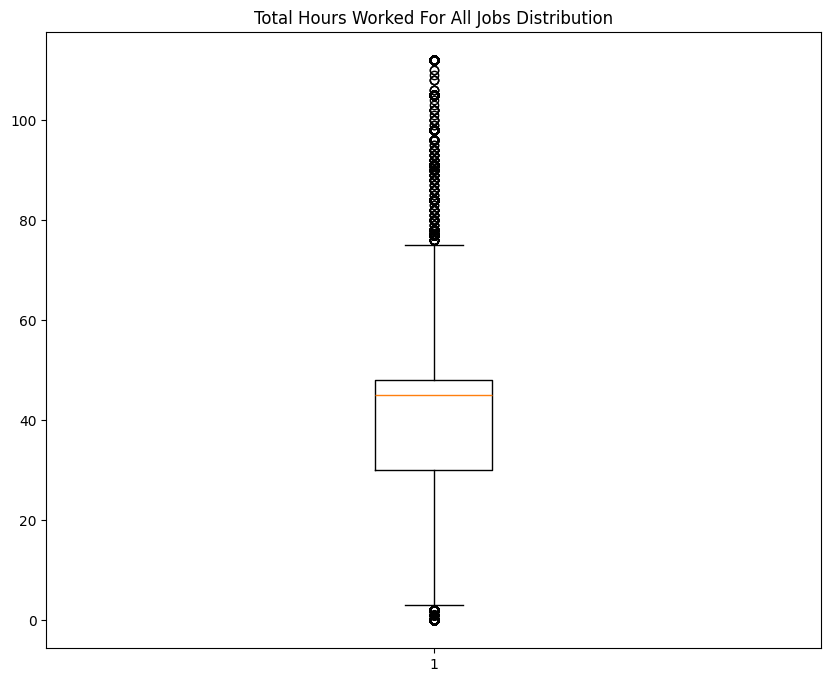

In [2013]:
plt.figure(figsize=(10, 8))
plt.boxplot(x=jobs_df['PUFC28_THOURS'])
plt.title('Total Hours Worked For All Jobs Distribution')
plt.show()

We can end it here because it's a range of numbers anyway

### Number of Household Members variable (PUFHHSIZE)

In [2014]:
jobs_df['PUFHHSIZE'].unique()

array([ 3,  4,  5,  1,  6,  8,  7, 12,  2, 14,  9, 10, 11, 13, 18, 16, 15,
       23, 17, 19])

We will also convert the data type to `int` to make it easier to work with.

In [2015]:
jobs_df['PUFHHSIZE'] = jobs_df['PUFHHSIZE'].astype('int')

We can check for whitespace values to see if there are any.

In [2016]:
whitespace_count = (jobs_df['PUFHHSIZE'].astype(str).str.strip() == '').sum()
whitespace_count

np.int64(0)

We can proceed to checking the distribution of the variable.

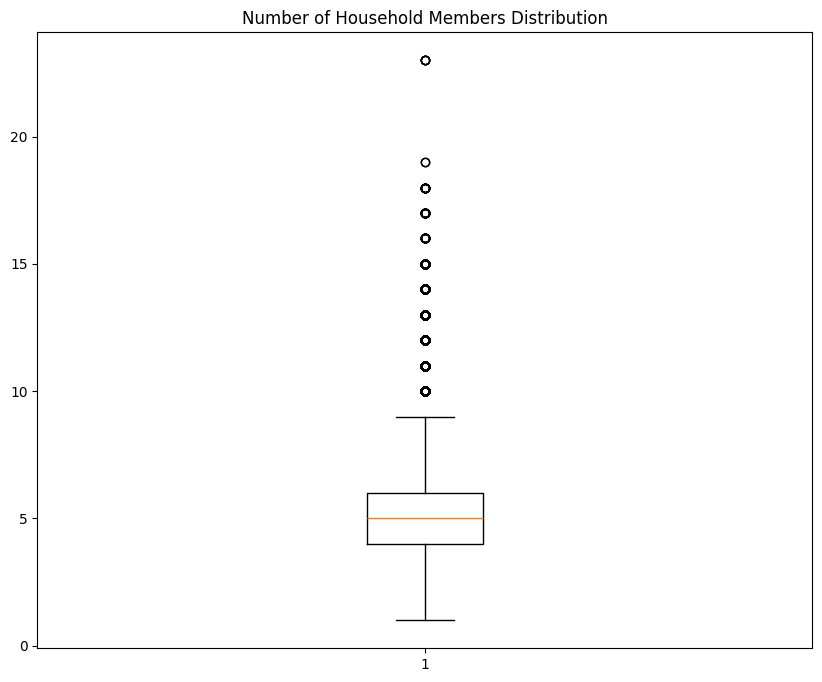

In [2017]:
plt.figure(figsize=(10, 8))
plt.boxplot(x=jobs_df['PUFHHSIZE'])
plt.title('Number of Household Members Distribution')
plt.show()

### Basic Pay variable (PUFC25_PBASIC)

In [2018]:
jobs_df['PUFC25_PBASIC'].unique()

array(['     ', '00250', '00115', ..., '00728', '01573', '00922'],
      dtype=object)

In [2019]:
# Turning the white space value into NaN
jobs_df['PUFC25_PBASIC'] = jobs_df['PUFC25_PBASIC'].replace(r'^\s*$', np.nan, regex=True)

jobs_df['PUFC25_PBASIC'].isnull().sum()

np.int64(34767)

In order to deal with the `NaN` values, we will set the value to 0 and convert the data type into integer to make it easier to work with later on.

We will also convert the data type to `int` to make it easier to work with.

In [2020]:
# Setting the null value to 0
jobs_df['PUFC25_PBASIC'].fillna(0, inplace=True)

# Setting the dtype to int
jobs_df['PUFC25_PBASIC'] = jobs_df['PUFC25_PBASIC'].astype(int)

jobs_df['PUFC25_PBASIC'].unique()

C:\Users\gicac\AppData\Local\Temp\ipykernel_6332\3495477199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  jobs_df['PUFC25_PBASIC'].fillna(0, inplace=True)


array([   0,  250,  115, ...,  728, 1573,  922])

Since `0` represent data that we want to disregard, we will tackle the rest of Basic Pay per Day without the `0` values.

We will also visualize our data so we can see the distribution of our data.

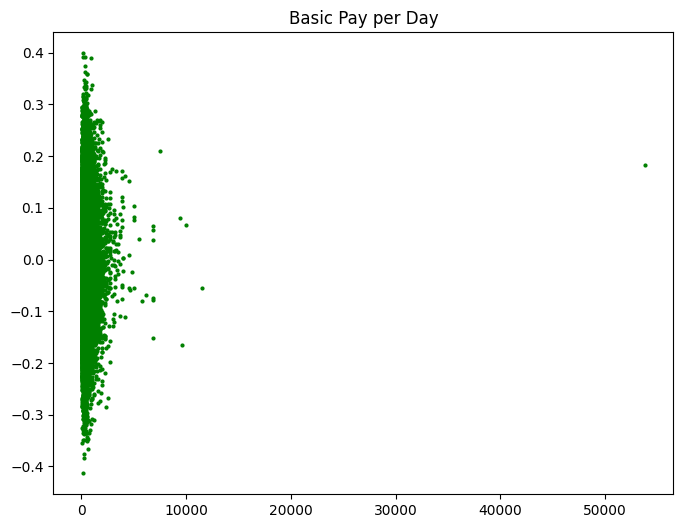

In [2021]:
jobs_df = jobs_df[jobs_df['PUFC25_PBASIC'] != 0]

plt.figure(figsize=(8, 6))
jitter = np.random.normal(0, 0.1, size=len(jobs_df['PUFC25_PBASIC']))
plt.plot(jobs_df['PUFC25_PBASIC'], jitter, 'go', markersize=2)
plt.title('Basic Pay per Day')
plt.show()

Since our data is skewed, we will apply log transformation in order to normalize our data.

In [2022]:
jobs_df['PUFC25_PBASIC'] = np.log(jobs_df['PUFC25_PBASIC'])

jobs_df['PUFC25_PBASIC']

2         5.521461
4         4.744932
5         5.298317
14        5.814131
15        5.857933
            ...   
180837    5.659482
180844    5.438079
180845    6.805723
180847    5.768321
180848    6.253829
Name: PUFC25_PBASIC, Length: 36588, dtype: float64

We will visualize the data again to check for outliers.

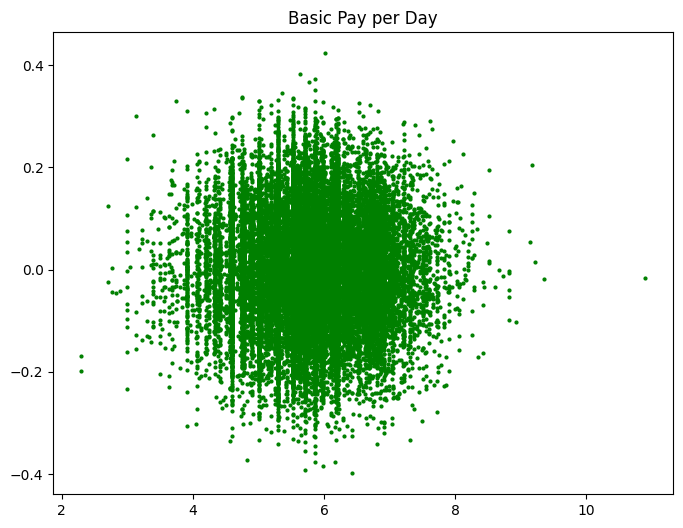

In [2023]:
plt.figure(figsize=(8, 6))
jitter = np.random.normal(0, 0.1, size=len(jobs_df['PUFC25_PBASIC']))
plt.plot(jobs_df['PUFC25_PBASIC'], jitter, 'go', markersize=2)
plt.title('Basic Pay per Day')
plt.show()

Since we still have some outliers, we can use the interquartile range and adjust its threshold.

In [2024]:
# Computing for the IQR

lbp_q1 = jobs_df['PUFC25_PBASIC'].quantile(0.25)
lbp_q3 = jobs_df['PUFC25_PBASIC'].quantile(0.75)
lbp_iqr = lbp_q3 - lbp_q1

# Computing for the adjusted IQR thresholds

lbp_lw = lbp_q1 - 2 * lbp_iqr
lbp_uw = lbp_q3 + 2 * lbp_iqr

# Removing the outliers from the DF
jobs_df = jobs_df[(jobs_df['PUFC25_PBASIC'] >= lbp_lw) & (jobs_df['PUFC25_PBASIC'] <= lbp_uw)]

outlier_count_after = jobs_df[(jobs_df['PUFC25_PBASIC'] < lbp_lw) | (jobs_df['PUFC25_PBASIC'] > lbp_uw)].shape[0]
print("Number of outliers:", outlier_count_after)

Number of outliers: 0


### Age variable (PUFC05_AGE)

`PUFC05_AGE` represents the age of the respondent as of their last birthday.

We first need to assess what range we are dealing with for the age.

In [2025]:
jobs_df['PUFC05_AGE'].unique()

array([19, 41, 20, 23, 71, 54, 27, 46, 38, 35, 51, 22, 44, 40, 26, 45, 52,
       55, 30, 62, 33, 29, 24, 21, 34, 25, 37, 43, 17, 60, 28, 42, 50, 58,
       57, 36, 18, 70, 48, 47, 61, 31, 32, 49, 39, 68, 53, 16, 56, 65, 63,
       59, 69, 87, 64, 75, 76, 15, 66, 67, 72, 85, 74, 83, 73, 77, 79, 78,
       80, 91, 81, 99, 82])

We can see that some of the unique variables go above your typical working age so we need to check if there are outliers within our data.

In [2026]:
jobs_df['PUFC05_AGE'] = jobs_df['PUFC05_AGE'].astype(int)

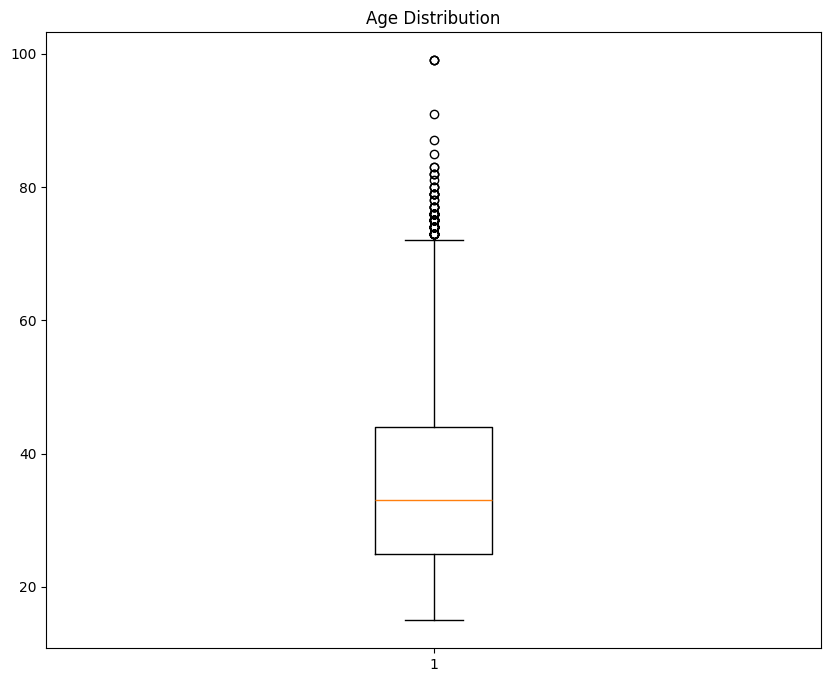

In [2027]:
# Initial Boxplot for the Age Distribution

plt.figure(figsize=(10, 8))
plt.boxplot(x=jobs_df['PUFC05_AGE'])
plt.title('Age Distribution')
plt.show()

Using the boxplot, we can easily spot the outliers in our data represented by the circles.

Since the outliers seem to be fairly manageable, we can do mean imputation to normalize the data.

In [2028]:
# Computing for the IQR

age_q1 = jobs_df['PUFC05_AGE'].quantile(0.25)
age_q3 = jobs_df['PUFC05_AGE'].quantile(0.75)
age_iqr = age_q3 - age_q1

# Getting the outliers

age_lw = age_q1 - 2 * age_iqr
age_uw = age_q3 + 2 * age_iqr
age_outliers = jobs_df[(jobs_df['PUFC05_AGE'] < age_lw) | (jobs_df['PUFC05_AGE'] > age_uw)]
age_outliers['PUFC05_AGE'].shape[0]

8

Let's get the mean of the ages without the outliers

In [2029]:
mean_val = jobs_df[(jobs_df['PUFC05_AGE'] >= age_lw) & (jobs_df['PUFC05_AGE'] <= age_uw)]['PUFC05_AGE'].mean()
mean_val

np.float64(35.33282069590531)

After getting the mean, we will use it to set the values of the outliers for the mean imputation.

In [2030]:
jobs_df.loc[(jobs_df['PUFC05_AGE'] < age_lw) | (jobs_df['PUFC05_AGE'] > age_uw), 'PUFC05_AGE'] = mean_val
outlier_count_after = jobs_df[(jobs_df['PUFC05_AGE'] < age_lw) | (jobs_df['PUFC05_AGE'] > age_uw)].shape[0]
print("Number of outliers after imputation:", outlier_count_after)

Number of outliers after imputation: 0


C:\Users\gicac\AppData\Local\Temp\ipykernel_6332\1394142130.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '35.33282069590531' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  jobs_df.loc[(jobs_df['PUFC05_AGE'] < age_lw) | (jobs_df['PUFC05_AGE'] > age_uw), 'PUFC05_AGE'] = mean_val


### Work Hours per Day variable (PUFC18_PNWHRS)

`PUFC18_PNWHRS` represent the different normal working hours per day ranging from 1 to 16.

In [2031]:
jobs_df['PUFC18_PNWHRS'].unique()

array(['08', '12', '04', '10', '09', '06', '03', '05', '07', '01', '02',
       '15', '11', '14', '16', '13'], dtype=object)

We can convert this data into an integer type in order to easily work with the data later on.

In [2032]:
jobs_df['PUFC18_PNWHRS'] = jobs_df['PUFC18_PNWHRS'].astype(int)
jobs_df['PUFC18_PNWHRS'].unique()

array([ 8, 12,  4, 10,  9,  6,  3,  5,  7,  1,  2, 15, 11, 14, 16, 13])

### Total Work Hours variable (PUFC19_PHOURS)

`PUFC19_PHOURS` represent the total work hours in the past week, including the primary and secondary occupation (if any).

The value set includes numbers ranging from 0 to 112, for the work hours wherein 0 represents the non-workers in the survey and 999 for not reported.

In [2033]:
jobs_df['PUFC19_PHOURS'].unique()

array(['024', '072', '048', '060', '016', '040', '070', '045', '032',
       '054', '042', '006', '028', '008', '030', '056', '036', '020',
       '015', '009', '021', '084', '000', '050', '018', '012', '014',
       '004', '035', '044', '090', '077', '049', '025', '052', '064',
       '059', '057', '010', '027', '063', '066', '003', '112', '096',
       '078', '091', '098', '022', '055', '007', '002', '058', '005',
       '075', '033', '105', '062', '031', '011', '034', '026', '094',
       '065', '001', '039', '041', '092', '046', '038', '051', '080',
       '074', '068', '061', '019', '088', '069', '073', '082', '013',
       '081', '053', '043', '047', '067', '037', '108'], dtype=object)

The data does not include 0 and 999 anymore as we have been able to filter the data previously to only accommodate the working respondents.

However, similar to our previous variable, we can also convert the data type into integer so it will be easier to work with it later on.

In [2034]:
jobs_df['PUFC19_PHOURS'] = jobs_df['PUFC19_PHOURS'].astype(int)
jobs_df['PUFC19_PHOURS'].unique()

array([ 24,  72,  48,  60,  16,  40,  70,  45,  32,  54,  42,   6,  28,
         8,  30,  56,  36,  20,  15,   9,  21,  84,   0,  50,  18,  12,
        14,   4,  35,  44,  90,  77,  49,  25,  52,  64,  59,  57,  10,
        27,  63,  66,   3, 112,  96,  78,  91,  98,  22,  55,   7,   2,
        58,   5,  75,  33, 105,  62,  31,  11,  34,  26,  94,  65,   1,
        39,  41,  92,  46,  38,  51,  80,  74,  68,  61,  19,  88,  69,
        73,  82,  13,  81,  53,  43,  47,  67,  37, 108])

We have found duplicates, so we implement VAE after all of the data has been cleaned to replace the duplicates with synthetic data.

---
# **Section 5:**